In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

851.3

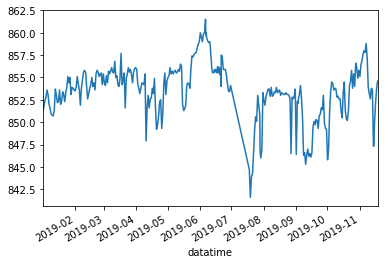

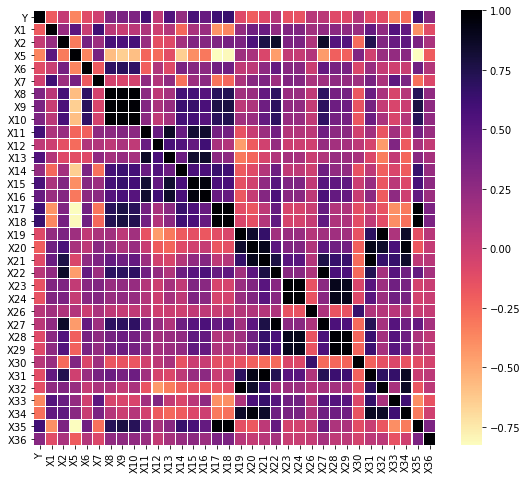

In [2]:
Data = pd.read_csv("/kaggle/input/dataforva/Data.csv", sep=';', parse_dates=['datatime'], dayfirst=True, index_col='datatime', decimal=',')
Data = Data.dropna()
Data = Data.drop(['X3', 'X4', 'X25'], axis = 1)
Data['Y'][:].plot()
corrmat = Data.corr()
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="magma_r", linewidths = 0.1)
Y = np.array(Data['Y'])
Data = Data.drop(['Y'], axis = 1)
X = preprocessing.normalize(Data)
X = np.array(Data)
Y[0]

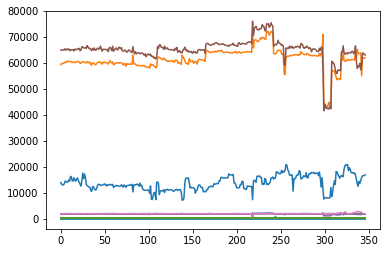

In [3]:
#Data = Data.drop(['X17', 'X8', 'X10', 'X34', 'X29'], axis = 1)
plt.plot(X)
plt.show()

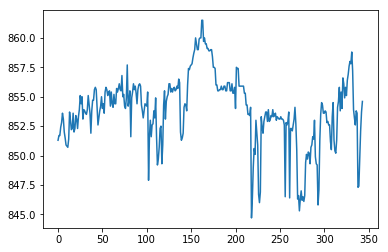

In [4]:
sigma_up = 3*np.std(Y) + np.mean(Y)
sigma_low = -3*np.std(Y) + np.mean(Y)
ind = list()
for i in range(Y.shape[0]):
    if ((Y[i] < sigma_low) or (Y[i] > sigma_up)):
        ind.append(i)
Y = np.delete(Y, ind, axis = 0)
X = np.delete(X, ind, axis = 0)
plt.plot(Y)
plt.show()

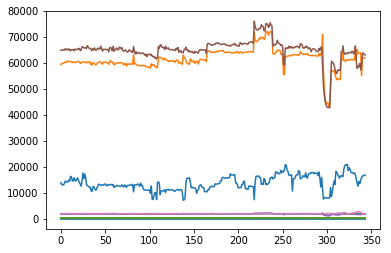

In [5]:
O = np.zeros(X.shape[1])
for j in range(X.shape[1]):
    for i in range(X.shape[0]):
        sigma_up = 3*np.std(X[:,j]) + np.mean(X[:,j])
        sigma_low = -3*np.std(X[:,j]) + np.mean(X[:,j])
        if ((X[i,j] < sigma_low) or (X[i,j] > sigma_up)):
            if ((i != 0) and (i != X.shape[1] - 1)):
                X[i,j] = (X[i-1,j] + X[i+1,j]) / 2
                O[j] = O[j] + 1
            else:
                X[i,j] = np.mean(X[:,j])
for ind, num_mean in enumerate(O):
    if num_mean >= X.shape[1]/2:
        X = np.delete(X, ind, axis = 1)
plt.plot(X)
plt.show()
#print(O)

In [6]:
X.shape

(344, 33)

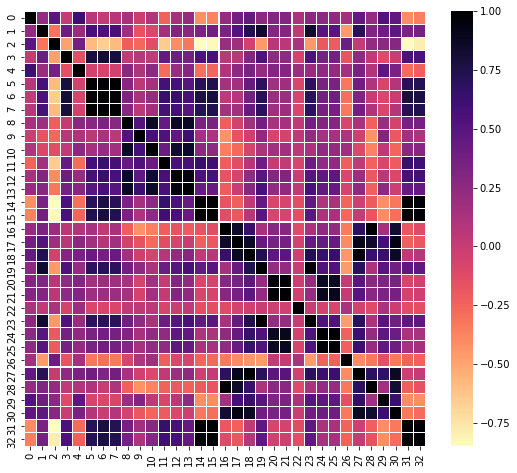

In [7]:
#X = np.delete(X, 7, axis = 1)
data = pd.DataFrame(X)
corrmat = data.corr()
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="magma_r", linewidths = 0.1)


In [8]:
#X = np.delete(X, 9, axis = 1)

In [9]:
models = [LinearRegression(), # метод наименьших квадратов
          RandomForestRegressor(n_estimators=100, max_features ='sqrt'), # случайный лес
          KNeighborsRegressor(n_neighbors=6), # метод ближайших соседей
          ]
Xtrn, Xtest, Ytrn, Ytest = train_test_split(X, Y, test_size=0.4)

In [10]:
R2 = []
#для каждой модели из списка
for model in models:
    model.fit(Xtrn, Ytrn) 
    R2.append(r2_score(Ytest, model.predict(Xtest)))
print(R2)



[0.789465700135942, 0.8206013175663952, 0.5178880808275206]


array([0.01612571, 0.00985767, 0.01443589, 0.01952921, 0.01746435,
       0.01680172, 0.0301129 , 0.02163728, 0.04421517, 0.01421593,
       0.05607617, 0.01965673, 0.10870278, 0.05048312, 0.07465205,
       0.08268597, 0.01099833, 0.02361007, 0.00949819, 0.0185733 ,
       0.02692264, 0.02594091, 0.00845272, 0.01858539, 0.01701868,
       0.01357334, 0.00727555, 0.02017579, 0.00953974, 0.01782953,
       0.01508326, 0.07403242, 0.08623751])

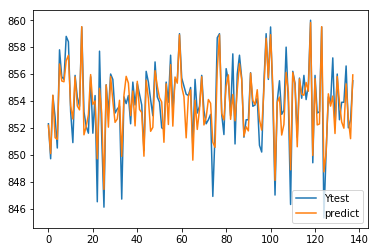

In [11]:
model = models[1]
model.fit(Xtrn, Ytrn)
plt.plot(Ytest, label = u'Ytest')
plt.plot(model.predict(Xtest), label = u'predict')
plt.legend()
model.feature_importances_